In [75]:
import numpy as np
import pytest

In [76]:
from scipy.ndimage import shift, map_coordinates

In [138]:
from openpiv_cxx import validation, interpolate

In [81]:
from matplotlib import pyplot as plt

In [127]:
def sample_vec_field(
    field_size: tuple([int,int]) = (32, 32)
):
    x, y = np.meshgrid(
        np.arange(field_size[0]),
        np.arange(field_size[1])
    )
    x = x.astype(float)
    y = y.astype(float)
    
    # create s2n
    s2n = np.random.rand(field_size[0], field_size[1])
    s2n = np.clip(s2n * 10, 2, 10)
    s2n[int(field_size[0] / 2), int(field_size[1] / 2)] = 0.8
    
    # create velocity field
    u = np.ones(x.shape) * 2
    v = np.ones(x.shape) * 2

    # create outlier
    u[int(field_size[0] / 3), int(field_size[1] / 3)] = -4.0
    v[int(field_size[0] / 3), int(field_size[1] / 3)] = -4.0
    
    return u, v, s2n

In [136]:
def test_difference_val() -> None:
    u, v, s2n = sample_vec_field()
    
    invalid_ind = ( u.shape[0] // 3, u.shape[1] // 3 )

    res = validation.normalized_local_median(
        u,
        v,
        1.2,
        convention = "!openpiv"
    )
    
    
    assert res[invalid_ind[0], invalid_ind[1]] == 1
    assert np.count_nonzero(res) == 1

In [137]:
test_difference_val()

In [110]:
x, y, u, v, _ = sample_vec_field()

In [118]:
res = validation.normalized_local_median(
    u,
    v,
    1.2,
    convention = "!openpiv"
)

In [121]:
np.count_nonzero(res)

1

In [119]:
mask = res.copy().astype(bool)
invalid = mask
valid = ~invalid

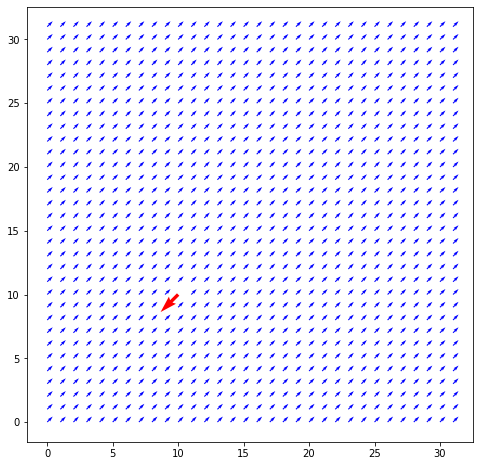

In [120]:
fig, ax = plt.subplots(figsize = (8,8))
ax.quiver(x[valid],y[valid],u[valid],v[valid], color = 'b')
ax.quiver(x[invalid],y[invalid],u[invalid],v[invalid], color = 'r')

In [149]:
data = np.array([[4,3,2,1,2,3,4,2,3,6],
                 [5,4,3,2,3,4,5,1,2,8],
                 [0,1,2,3,2,1,0,7,3,6],
                 [6,7,8,9,8,7,6,8,2,5],
                 [6,1,0,2,9,3,2,2,7,9],
                 [9,8,7,6,5,4,3,1,8,3],
                 [1,7,3,7,9,2,6,3,0,2],
                 [6,8,3,5,8,1,7,7,3,5],
                 [4,1,7,3,6,3,6,8,4,6],
                 [0,1,2,3,4,3,2,1,8,4]], dtype = float)

diff = 1
idy, idx = np.indices(data.shape)

idy = idy.astype(float)
idx = idx.astype(float)

idy -= diff
idx -= diff
expected = map_coordinates(data, (idy, idx, ), order = 3)
result = interpolate.taylor_expansion2D(data, idy, idx, order = 1, keep_dtype = True)

In [150]:
result

array([[4., 4., 3., 2., 1., 2., 3., 4., 2., 3.],
       [4., 4., 3., 2., 1., 2., 3., 4., 2., 3.],
       [5., 5., 4., 3., 2., 3., 4., 5., 1., 2.],
       [0., 0., 1., 2., 3., 2., 1., 0., 7., 3.],
       [6., 6., 7., 8., 9., 8., 7., 6., 8., 2.],
       [6., 6., 1., 0., 2., 9., 3., 2., 2., 7.],
       [9., 9., 8., 7., 6., 5., 4., 3., 1., 8.],
       [1., 1., 7., 3., 7., 9., 2., 6., 3., 0.],
       [6., 6., 8., 3., 5., 8., 1., 7., 7., 3.],
       [4., 4., 1., 7., 3., 6., 3., 6., 8., 4.]])

In [151]:
"int" in "int32_t"

True

In [147]:
np.testing.assert_array_almost_equal(result[3:, 3:], expected[3:, 3:])

AssertionError: 
Arrays are not almost equal to 6 decimals

Mismatched elements: 49 / 49 (100%)
Max absolute difference: 0.03143124
Max relative difference: 8.40602151e+13
 x: array([[2.019601, 3.013431, 2.009809, 1.007071, 0.031431, 6.986102,
        3.002514],
       [7.97743 , 8.980435, 8.001334, 6.983152, 5.997261, 7.980637,...
 y: array([[ 2.000000e+00,  3.000000e+00,  2.000000e+00,  1.000000e+00,
        -3.739134e-16,  7.000000e+00,  3.000000e+00],
       [ 8.000000e+00,  9.000000e+00,  8.000000e+00,  7.000000e+00,...

In [68]:
test_fft_correlate_images_wrong_inputs()[0].shape

(32, 32)

In [9]:
data = np.array([[4,3,2,1,2,3,4],
                 [5,4,3,2,3,4,5],
                 [0,1,2,3,2,1,0],
                 [6,7,8,9,8,7,6],
                 [6,1,0,2,9,3,2],
                 [9,8,7,6,5,4,3]], dtype = float)

In [41]:
data[1:, 1:]

array([[4., 3., 2., 3., 4., 5.],
       [1., 2., 3., 2., 1., 0.],
       [7., 8., 9., 8., 7., 6.],
       [1., 0., 2., 9., 3., 2.],
       [8., 7., 6., 5., 4., 3.]])

In [11]:
idy, idx = np.indices(data.shape).astype(float)
idy -= 0.5
idx -= 0.5

In [23]:
from scipy.ndimage import shift

In [45]:
shift(data, 0.5, order = 1)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 4.  , 3.  , 2.  , 2.  , 3.  , 4.  ],
       [0.  , 2.5 , 2.5 , 2.5 , 2.5 , 2.5 , 2.5 ],
       [0.  , 3.5 , 4.5 , 5.5 , 5.5 , 4.5 , 3.5 ],
       [0.  , 5.  , 4.  , 4.75, 7.  , 6.75, 4.5 ],
       [0.  , 6.  , 4.  , 3.75, 5.5 , 5.25, 3.  ]])

In [12]:
expected = np.array([[4, 4, 3, 2, 1, 2, 3],
                     [4, 4, 3, 2, 1, 2, 3],
                     [5, 5, 4, 3, 2, 3, 4],
                     [0, 0, 1, 2, 3, 2, 1],
                     [6, 6, 7, 8, 9, 8, 7],
                     [6, 6, 1, 0, 2, 9, 3]])

In [44]:
whittaker2D(data, idy, idx, radius = 1, keep_dtype = False)

array([[0.7199274 , 1.61983601, 0.7649233 , 0.31496889, 0.40495959,
        1.03489542, 1.48484983],
       [2.69972495, 6.47933625, 3.64462858, 2.29476643, 2.56473835,
        4.45454432, 5.80440647],
       [0.94490471, 3.10468347, 2.87970658, 3.10468325, 3.059688  ,
        2.74472084, 2.51974418],
       [0.85491465, 4.45454562, 5.75941209, 7.33425091, 7.01928375,
        4.81451061, 3.2396718 ],
       [3.82460979, 7.96418436, 4.45454691, 5.98438962, 9.67401151,
        9.17906228, 4.94949657],
       [4.36455512, 7.96418695, 2.69972905, 2.87970961, 6.02938638,
        5.80440906, 1.57484335]])

In [6]:
res

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 3, 2, 1, 0, 1, 2],
       [0, 4, 3, 2, 1, 2, 3],
       [0, 0, 0, 1, 2, 1, 0],
       [0, 5, 6, 7, 8, 7, 6],
       [0, 5, 0, 0, 1, 8, 2]])